<img
src="https://www.imt-atlantique.fr/sites/default/files/Images/Ecole/charte-graphique/IMT_Atlantique_logo_RVB_Baseline_400x272.jpg"
WIDTH=200 HEIGHT=200>

<CENTER>
</br>
<p><font size="5"> TAF MCE - 2022</span></p>
<p><font size="4">  UE Stochastic dynamic systems </font></p>
<p></p>
<p><font size="5">  Notebook 02: Julia lab - Stochastic differential equations </font></p>
<p><font size="4">  By Kevin Michalewicz </font></p>
</p></br>
</p>
</CENTER>

----------

# <span style="color:#00B8DE">I - Simulation of SDEs (lab 4)</span>

1 - Define a function **Gauss(m=0,v=1)** that returns a function that takes an argument $x$ and returns the value $\mathcal{N}(x;m,v)$.

2 - Define a structure named **Brownian** with the following fields: 

    Δ     # sampling stepsize
    Tmin  # initial time
    Tmax  # final time
    B0    # initial value
    σ2    # variance
Add methods **sample** and **draw** that respectively sample the Brownian motion and plots a given number of trajectories. Design also a method **hist** that plots the histogram of the Brownian motion at a given time $t$ in $[Tmin,Tmax]$ and for a given number of realizations.

3 - Run the code and check that the results are coherent.

4 - We consider the Black-Scholes equation
$$
dX_t = rX_tdt + aX_tdB_t
$$
with $r=-1$ and $a=1$. Recall the analytic solution for this equation and plot it over
$[0,1]$for realizations of $B_t$ sampled at 1000 points.

5 - Implement Euler, Millstein and Runge-Kutta with order 1.5 methods. Possibly, create a **model** structure with fields drift, diffusion and the derivative of diffusion so that the integration method can apply automatically from model and Brownian trajectory specification. 
Plot the solutions corresponding solutions and compute the mean squared error. Possibly different sampling stepsize could be considered. Conclusions ?

In [197]:
using Distributions
using Plots
using Random
using Statistics

In [2]:
# 1
function Gauss(;m=0.,σ2=1.)
    return f(x) = pdf(Normal(m,sqrt(σ2)),x)
end

Gauss (generic function with 1 method)

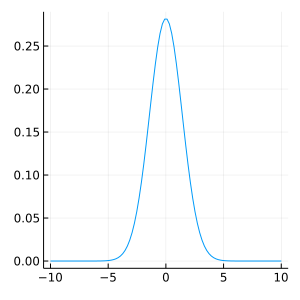

In [3]:
# test
f = Gauss(;m=0.,σ2=2.)
x = range(-10,stop=10,length=100)
plot(x,f.(x),size=(300,300),label="")

In [4]:
# 2
struct Brownian
    Δ     # sampling stepsize
    Tmin  # initial time
    Tmax  # final time
    B0    # initial value
    σ2    # variance
end

In [5]:
#test
B = Brownian(.01,0.,1.,0.,1.)
B.Δ,B.Tmin,B.Tmax,B.B0,B.σ2 

(0.01, 0.0, 1.0, 0.0, 1.0)

In [6]:
using LaTeXStrings

In [7]:
function sample(B::Brownian)
    # Generates a trajectories of the brownian motion B
    # returns a trajectory on [B.Tmin,B.Tmax]
    
    t = B.Tmin:B.Δ:B.Tmax
    n = size(t)[1]
    
    trajectory = zeros(n)
    trajectory[1] = B.B0 # initial condition
    
    for k=2:n
        
        trajectory[k] = trajectory[k-1] + sqrt(B.σ2*B.Δ) * randn()
        
    end
    
    return trajectory # on [B.Tmin,B.Tmax]
end

function draw(B::Brownian ; nb_traj=100,enveloppe=true)
    # Plots trajectories of the brownian motion
    # nb_traj: number of trajectories to be plot
    # enveloppe: plots the enveloppe at B0+(+/-)3std
    
    t = B.Tmin:B.Δ:B.Tmax
    n = size(t)[1]
    
    plot(t, sample(B), title="Several Brownian motion trajectories")
    
    for _=2:nb_traj
        plot!(t, sample(B))
    end
    
    if enveloppe
        env = 3*sqrt.(B.σ2*B.Δ*range(1,stop=n)) 
        plot!(t, env .+ B.B0)
        plot!(t, -env .+ B.B0)
    end
    
end

draw (generic function with 1 method)

In [8]:
#test
draw(B;nb_traj=10^3)

In [9]:
function hist(B ; nb_traj=1000, t= :Nan)
    # Plots the histogram at t from nb_traj trajectories
    # of the Brownian motion together with the
    # theoretical distribution
    
    index = Int((t-B.Tmin)/B.Δ)
    trajectory = zeros(nb_traj)
    
    for k=1:nb_traj
        trajectory[k] = sample(B)[index] # we get nb_traj trajectories at time t through the index
    end
    
    histogram(trajectory, norm=true, title="Brownian motion distribution", label="Hisogram")

    f = Gauss(;m=0.,σ2=B.σ2*B.Δ*index)
    x = range(-10,stop=10,length=100)
    plot!(x,f.(x),label="Theoretical")
end

hist (generic function with 1 method)

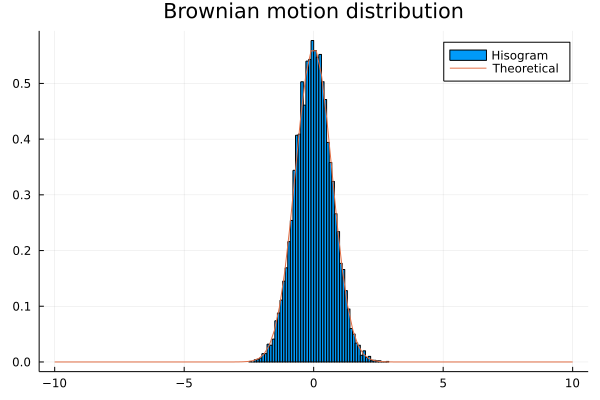

In [10]:
# 3
hist(B ; nb_traj=10^4, t=.5)

In [11]:
# 4

# Black-Scholes model
# Equation dX_t = rX_tdt + aX_tdB_t, with r=-1 et a=1
#----------------------------------------------------
r,a,X0  = -1.,1,1.

function black_scholes_trajectory(t,Bt;r=-1.,a=1,X0=1.)
    # returns sampling instants and samples
    # of a Black-holes trajectory
    # t:  sampling instants
    # Bt: brownian motion trajectory
    # r:  drift coefficient
    # a:  diffusion coefficient 
    # X0: initial value
    # Bt:  input brownian motion trajectory
    
    return X0*exp.((r - 0.5*a^2)t + a*Bt) # analytical solution
    
end

black_scholes_trajectory (generic function with 1 method)

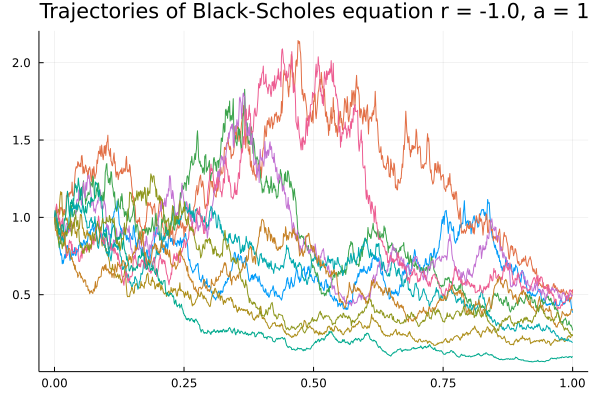

In [12]:
# test 
B = Brownian(.001,0.,1.,0.,1.)
t = B.Tmin:B.Δ:B.Tmax
p = plot()

for _ =1:10
    X = black_scholes_trajectory(t, sample(B))
    p = plot!(t,X,label="")
end
p = title!("Trajectories of Black-Scholes equation r = $r, a = $a")

In [13]:
# 5

struct model
    r 
    a 
    a_der 
end

In [14]:
# drift, diffusion and derivative of diffusion
m = model((t,x)->r*x,(t,x)->a*x,(t,x)->a)

model(var"#6#9"(), var"#7#10"(), var"#8#11"())

In [15]:
function integrate(m::model,t,Bt;X0=0,method="Euler")
    # Returns the trajectory of a stochastic differential equations
    # t:  sampling instant
    # Bt: input brownian motion trajectory
    # X0: initial value
    # method: 'Euler', 'Milstein' or 'Runge_Kutta_1.5'
    # output: trajectory X of the SDE
    
    n = length(t)
    X = zeros(n)
    X[1] = X0
    
    if method=="Euler"
        for j=2:n
            deltaB = Bt[j] - Bt[j-1]
            h = t[j] - t[j-1]
            
            X[j] = X[j-1] + m.r(t[j-1],X[j-1])*h + m.a(t[j-1],X[j-1])*deltaB

        end
        
    elseif method=="Milstein"     
        for j=2:n
            deltaB = Bt[j] - Bt[j-1]
            h = t[j] - t[j-1]
            
            euler_terms = X[j-1] + m.r(t[j-1],X[j-1])*h + m.a(t[j-1],X[j-1])*deltaB
            X[j] = euler_terms + 0.5*m.a(t[j-1],X[j-1]) * m.a_der(t[j-1],X[j-1]) * (deltaB^2-h)
        end
    
    elseif method=="Runge_Kutta_1.5"
            
        for j=2:n
            deltaB = Bt[j] - Bt[j-1]
            h = t[j] - t[j-1]
            
            euler_terms = X[j-1] + m.r(t[j-1],X[j-1])*h + m.a(t[j-1],X[j-1])*deltaB
            X_ = X[j-1] + m.r(t[j-1],X[j-1])*h + m.a(t[j-1],X[j-1])*sqrt(h)
            X[j] = euler_terms + 0.5*(m.a(t[j-1],X_)-m.a(t[j-1],X[j-1])) * (deltaB^2-h)/sqrt(h)
        end
        
    else
        println("Invalid method.")
    end
    
    return X # returning the trajectory
end

integrate (generic function with 1 method)

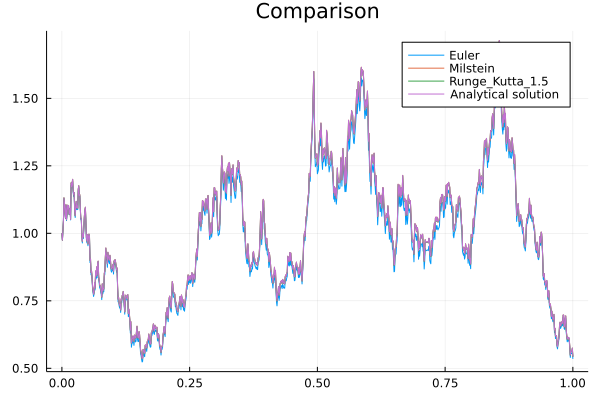

In [16]:
# Figures
stepsize = 0.001 # 0.1 0.01 10^(-5)
B = Brownian(stepsize,0.,1.,0.,1.) 
Bt = sample(B)
t = B.Tmin:B.Δ:B.Tmax
n = length(t)
p = plot(title="Comparison")
methods = ["Euler", "Milstein", "Runge_Kutta_1.5"]
X = zeros(n,4)

for k=1:3
    X[:,k] = integrate(m,t,Bt,X0=1,method=methods[k])
    p = plot!(t, X[:,k], label=methods[k])
end

X[:,4] = black_scholes_trajectory(t, Bt)
p = plot!(t,X[:,4],label="Analytical solution")

In [17]:
using Statistics: var

MSE_euler = var(X[:,4].-X[:,1])
MSE_milstein = var(X[:,4].-X[:,2])
MSE_runge_kutta = var(X[:,4].-X[:,3])

println("MSE for Euler: ", MSE_euler)
println("MSE for Milstein: ", MSE_milstein)
println("MSE for Runge Kutta with order 1.5: ", MSE_runge_kutta)

MSE for Euler: 8.437495491417326e-5
MSE for Milstein: 5.15716908499465e-8
MSE for Runge Kutta with order 1.5: 8.7772287306916e-8


For a sampling stepsize $\Delta = 10^{-3} s$ the three models are considerably similar to the trajectory given by the analytical solution. The mean squared error (MSE) goes from ~$10^{-6}$ (Euler) to ~$10^{-9}$ (Milstein and Runge Kutta). This tendency persists if $\Delta$ gets smaller.

Conversely, taking larger stepsizes, Milstein and Runge Kutta methods are still close to the real solution, but Euler differs from it. For example, for $\Delta = 10^{-2} s$ we find that Euler's MSE is ~$10^{-4}$ and just ~$10^{-6}$ in the other two cases.

This is because Euler's method is of order $\frac{1}{2}$ because the term $\sigma(X_t) \Delta B_t$ is of order $\frac{1}{2}$, since $\mathbb{E} \left[\left| \Delta B_t\right|\right] \propto \sqrt{h}$. The other two methods incorporate additional terms to increase their order and, in particular, Runge-Kutta 1.5 has the advantage of not including the derivative of the diffusion.

-------

# <span style="color:#00B8DE">II - Parameter estimation for SDEs (lab 5&6)</span>

Let us consider the following SDE:
$$
dX_t=b(X_t)dt+\theta\sigma(X_t)dB_t\quad (1)
$$
a regularly sampled trajectory of which is observed at instants $t_i$. let $X_i=X_{t_i}$ ($i=1,\ldots,n$) 
denote observation variables $x_i,…,x_n$ corresponding observations. We shall assume that functions $b(x)$ and
$\sigma(x)$ are known but that $\theta$ is unknown 
 and changes at a given, instant that we want to estimate.

1 - Denoting by $\Delta$ the sampling period, supply the discretized version of (1) for Euler sampling method.

2 - We define the normalized increments as
$$
Z_i=\theta \dfrac{B_{i+1}−B_i}{\sqrt \Delta}\quad (2)
$$
Express $Z_i$ in terms of observation variables  Xi and give their distribution.

3 - Let $k$ denote the index value in $\{2,\ldots,n−1\}$ from which the value of $\theta$ 
changes. Let $\theta_1$ denote the value taken by $\theta$ until the time $\tau$ corresponding to $k$
and $\theta_2$ the value it takes after this instant. Compute maximum likelihood estimators of $\theta_1^2$ and $\theta_2^2$ as a function of $\tau$.

4 - Then check that the maximum likelihood estimator of the position $k$ of system transition is given by 
$\hat{k}=\arg\min_k D_k$, with
$$
D_k=k\log\dfrac{S_k}{k}+(n−k)\log\dfrac{S_n−S_k}{n−k}\quad (3)
$$
and $S_k=\sum^k_{i=1}Z^2_i$.

5 - As an example, we consider the Cox-Ingersoll-Ross processus with equation
$$
dX_t=(a−bX_t)dt+θ\sqrt{X_t}dBt \quad (4)
$$
This model has been used first to model population growth. The solution is given by
$$
X_t=X_0+\dfrac a b (1−e^{−bt})+\theta\int_0^te^{b(u−t)}\sqrt{X_u}dB_u\quad (5)
$$
6 - Let $(a,b)=(5,2)$, $\tau=0.6$ and $(\theta_1,\theta_2)=(1,3)$. 
Plot a few trajectories of the process over $[0,1]$ with for instance $X_0=4$. 
To this end, you can discretize the solution (5) directly with a stepsize $\Delta=10^{−2}$.

7 - Plot the evolution of the decision variable $D_k$ with $k$ for several simulated  trajectories.

8 - Estimate $\tau$ and $(\theta_1,\theta_2)$ for these trajectories and plot the sequence of values obtained.

9 - Still assuming that the term $\sigma(X_t)=\sqrt{X_t}$ of the SDE is known but its drift $b(x)$ is know unknown, use a non parametric kernel method to estimate $b(x)$ and then apply the method considered above to detect the instant when the diffusion term of the system changes. Implement this approach and apply it to the observed trajectory. Study the values obtained for the estimates of $\tau$ and $(\theta_1,\theta_2)$. Comments ?

1. The discretized version of the original SDE is

$$X_{i+1}=X_i+b(X_i)\Delta+\theta\sigma(X_i)(B_{i+1}-B_i)$$

2. $Z_i$ can be written as

$$Z_i = \frac{X_{i+1}-X_i-b(X_i)\Delta}{\sqrt{\Delta}\sigma(X_i)}$$

and $$Z_i \sim \mathcal{N}(0,\theta^{2})\$$

3. The ML estimators are (as a function of $\tau$)

$${\hat{\theta_1^2}}_{,ML} = \frac{S_{\frac{\tau}{\Delta}} \Delta}{\tau}$$

$${\hat{\theta_2^2}}_{,ML}= \frac{(S_{\frac{t_n}{\Delta}}-S_{\frac{\tau}{\Delta}})\Delta}{t_n-\tau}$$

but we can also write them just as

$${\hat{\theta_1^2}}_{,ML} = \frac{S_k}{k}$$

$${\hat{\theta_2^2}}_{,ML}= \frac{S_n - S_k}{n-k}$$

4. First we write the likelihood as a product of the probability densities of every transition of $Z_i$. The variance of these variables will change as soon as index $k=\frac{\tau}{\Delta}$ is reached, so we use the previous expressions. By maximizing the log-likelihood (partial derivatives with respect to $\theta_1$ and $\theta_2$ should go to zero) we obtained the estimators' expressions. Then, replacing these results in the log-likelihood, we arrive to the expected $D_k$ formula.

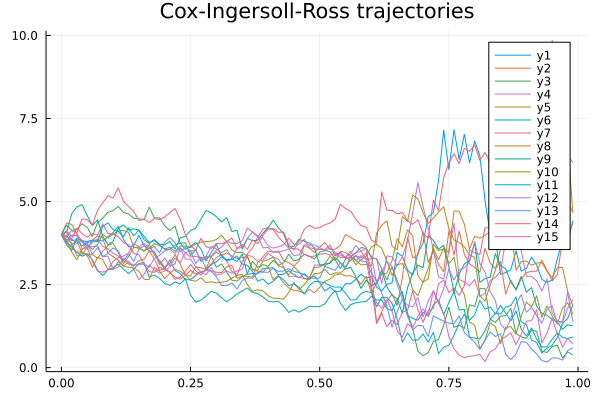

In [291]:
# 6 - trajectories of Cox-Ingersoll-Ross process
# note that in some cases numerical errors can lead
# to negative values
#------------------------------------------------
Random.seed!(47)
(a,b) = (5,2)
τ = 0.6
(θ1,θ2) = (1,3)
nb_traj = 15 # number of trajectories
Δ = 10^(-2) # stepsize
n = length(t)
X = zeros(n, nb_traj)
X[1,:] = 4*ones(nb_traj) # X0 = 4, as proposed, for every trajectory
Z = zeros(n-1, nb_traj)

B = Brownian(Δ,0.,1.,0.,1.)
t = B.Tmin:B.Δ:B.Tmax

for k=1:nb_traj
    
    B_vector = sample(B)
    
    for j=2:n
        deltaB = B_vector[j] - B_vector[j-1]
        if t[j] < τ # because θ changes at time τ
            θ = θ1
        else
            θ = θ2
        end
        
        X[j,k] = X[j-1,k] + (a-b*X[j-1,k]) * Δ + θ * sqrt(X[j-1,k]) * deltaB

    end
    
    Z[:,k] = (X[2:n,k] - X[1:n-1,k] - (a.-b.*X[1:n-1,k])*Δ) ./ sqrt.(X[1:n-1,k]*Δ)
    
end


p = plot()

for i=1:nb_traj
    plot!(t,X[:,i],title="Cox-Ingersoll-Ross trajectories")
end

p

τ's estimator gives: 0.596 seconds.

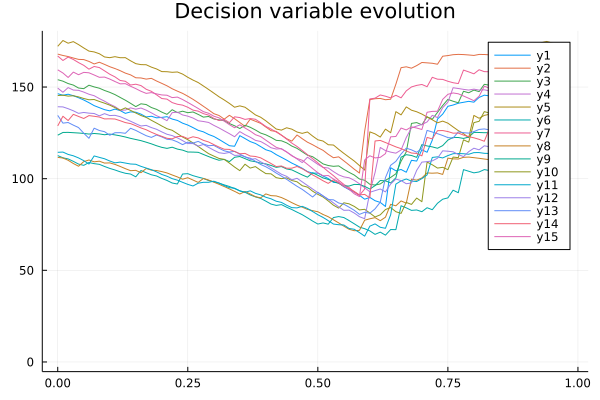

In [292]:
# 7 & 8 - Decision variable D_k
#--------------------------------------
D_k = zeros(n,nb_traj)
k_hats = zeros(nb_traj)

for j=1:nb_traj
    
    Sn = sum(Z[:,j].^2)
   
    for k=1:n-1
        Sk = sum(Z[1:k,j].^2)
        D_k[k,j] = k*log(Sk/k) + (n-k) * log((Sn-Sk)/(n-k))
    end
end

p = plot()

for i=1:nb_traj
    plot!(t, D_k[:,i], title="Decision variable evolution")
    k_hats[i] = argmin(D_k[2:n-2,i])
end

τ_est = k_hats.*B.Δ/(B.Tmax-B.Tmin)
print("τ's estimator gives: ", round(mean(τ_est),digits=3), " seconds.")

p

In [293]:
# θ1 and θ2 estimations
#--------------------------------------
θ1_est = zeros(nb_traj)
θ2_est = zeros(nb_traj)

for i=1:nb_traj
    k = Int(k_hats[i])
    θ1_est[i] = sqrt(sum(Z[1:k,i].^2)/k)
    θ2_est[i] = sqrt(sum(Z[k+1:n-1,i].^2)/(n-k))
end

println("(θ1_hat,θ2_hat) = (", round(mean(θ1_est),digits=3),",", round(mean(θ2_est),digits=3),")")

(θ1_hat,θ2_hat) = (0.999,3.001)


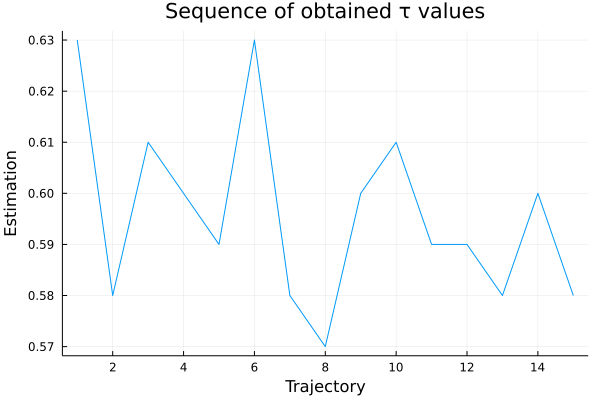

In [294]:
plot(τ_est, xlabel="Trajectory", ylabel="Estimation", title="Sequence of obtained τ values", label=false)

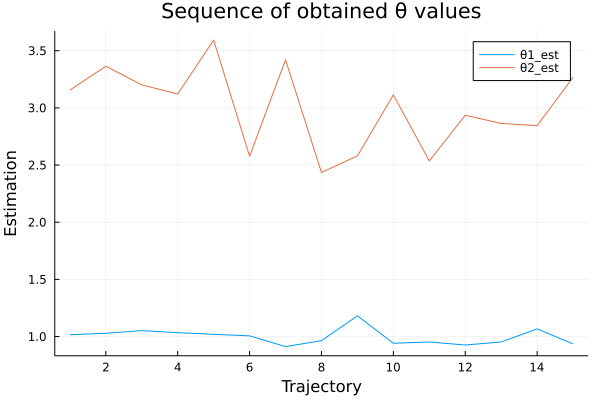

In [295]:
plot(θ1_est, xlabel="Trajectory", ylabel="Estimation", title="Sequence of obtained θ values", label="θ1_est")
plot!(θ2_est, label="θ2_est")

τ's estimator gives: 0.595 seconds.

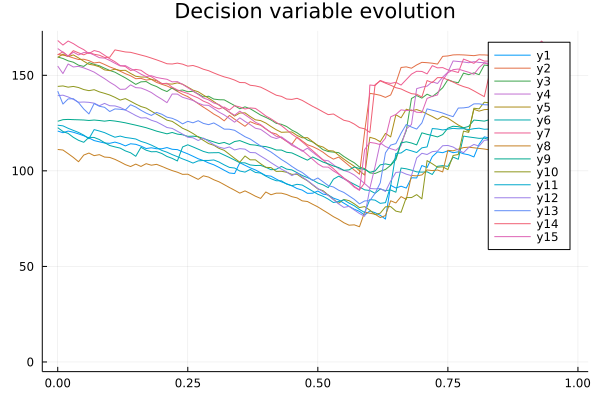

In [301]:
# 9 - Estimation with unknown drift
#---------------------------------------
function b_hat(X_,K)
    return sum([K.(X_.-X[j-1]).*(X[j]-X[j-1]) for j=2:n-1])/(Δ*sum([K.(X_.-X[j-1]) for j=2:n-1]))
end


for i=1:nb_traj
    h_n = std(X[:,i])*n^(-1/5) # recommended value for the bandwidth in the paragraph after eq. 126 (notes)
    K = Gauss(;m=0.,σ2=h_n^2) # gaussian Kernel
    Z[:,i] = (X[2:n,i] - X[1:n-1,i] - b_hat.(X[1:n-1,i],K)*Δ) ./ sqrt.(X[1:n-1,i]*Δ)
end

D_k = zeros(n,nb_traj)
k_hats = zeros(nb_traj)

for j=1:nb_traj
    
    Sn = sum(Z[:,j].^2)
   
    for k=1:n-1
        Sk = sum(Z[1:k,j].^2)
        D_k[k,j] = k*log(Sk/k) + (n-k) * log((Sn-Sk)/(n-k))
    end
end

p = plot()

for i=1:nb_traj
    plot!(t, D_k[:,i], title="Decision variable evolution")
    k_hats[i] = argmin(D_k[2:n-2,i])
end

τ_est = k_hats.*B.Δ/(B.Tmax-B.Tmin)
print("τ's estimator gives: ", round(mean(τ_est),digits=3), " seconds.")

p


In [302]:
# θ1 and θ2 estimations
#--------------------------------------
θ1_est = zeros(nb_traj)
θ2_est = zeros(nb_traj)

for i=1:nb_traj
    k = Int(k_hats[i])
    θ1_est[i] = sqrt(sum(Z[1:k,i].^2)/k)
    θ2_est[i] = sqrt(sum(Z[k+1:n-1,i].^2)/(n-k))
end

println("(θ1_hat,θ2_hat) = (", round(mean(θ1_est),digits=3),",", round(mean(θ2_est),digits=3),")")

(θ1_hat,θ2_hat) = (1.018,3.019)


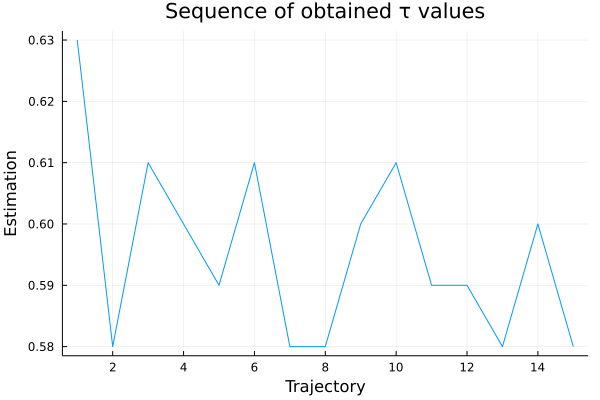

In [303]:
plot(τ_est, xlabel="Trajectory", ylabel="Estimation", title="Sequence of obtained τ values", label=false)

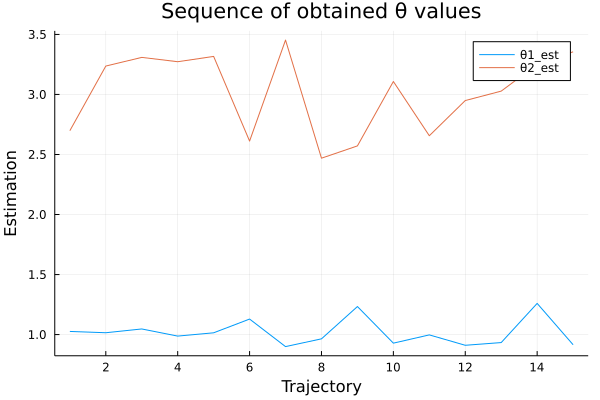

In [304]:
plot(θ1_est, xlabel="Trajectory", ylabel="Estimation", title="Sequence of obtained θ values", label="θ1_est")
plot!(θ2_est, label="θ2_est")

**Comment:** the obtained values of $\tau$, $\theta_1$ and $\theta_2$ are less close to the real ones. However, taking into account that the drift $b(x)$ was unknown and needed to be estimated, the degradation in the estimation is low. 